In [10]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [11]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [12]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [23]:
def compute_cost(y, tx, w):
    return compute_cost_MSE(y,tx,w)
    
def compute_cost_MSE(y,tx,w):
    e=y-(tx @ w)
    return 1/2/y.shape[0]*(e.T @ e)
def compute_cost_MAE(y,tx,w):
    e=y-(tx @ w)
    return 1/y.shape[0]*np.absolute(e).sum()
    
w=np.array([1,4])
print(compute_cost(y,tx,w.T))

2673.52394102


# Grid Search

Fill in the function `grid_search()` below:

In [24]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    
    for i in np.arange(len(w0)) :
        for j in np.arange(len(w1)):
            loss[i,j]=compute_cost(y,tx,np.array([w0[i],w1[j]]))
    
    return loss

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


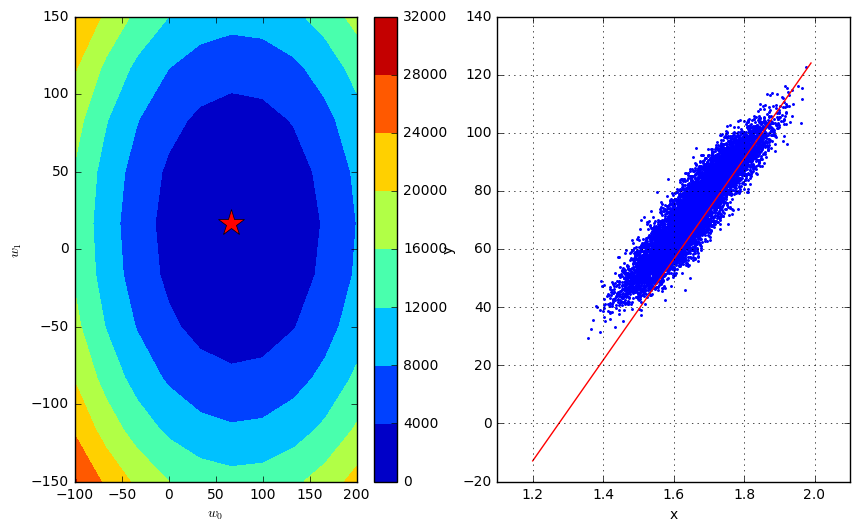

In [25]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    return compute_gradient_MSE(y,tx,w)

def compute_gradient_MSE(y,tx,w):
    """Compute the gradient."""
    e=y-(tx @ w)
    return -1/y.shape[0]*tx.T @ e

def compute_gradient_MAE(y,tx,w):
    sumX=0
    sumY=0
    for n in range(0,y.shape[0]):
        temp=y[n]-w[0]-w[1]*tx[n,1]
        if(temp>0):
            sumX=sumX-1
            sumY=sumY-tx[n,1]
        if(temp<0):
            sumX=sumX+1
            sumY=sumY+tx[n,1]
    return np.array([sumX/y.shape[0],sumY/y.shape[0]])

e=y-(tx @ np.array([73.29392194331982,13.479712434880094]).T)
print(-1/y.shape[0]*tx.T @ e)
compute_gradient(y,tx,[73.29392194331982,13.479712434880094])

[ -5.87853731e-08  -1.08954722e-10]


array([ -5.87853731e-08,  -1.08954722e-10])

Please fill in the functions `gradient_descent` below:

In [22]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient=compute_gradient(y,tx,w)
        loss=compute_cost(y,tx,w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*gradient
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [23]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591665, w0=29.31756880084207, w1=5.391884973995568
Gradient Descent(1/49): loss=1015.0521848293514, w0=46.90811008134732, w1=8.627015958392962
Gradient Descent(2/49): loss=375.2657547746175, w0=57.46243484965046, w1=10.568094549031377
Gradient Descent(3/49): loss=144.94263995491326, w0=63.79502971063236, w1=11.732741703414431
Gradient Descent(4/49): loss=62.0263186198195, w0=67.59458662722149, w1=12.431529996044274
Gradient Descent(5/49): loss=32.17644293918587, w0=69.87432077717496, w1=12.85080297162218
Gradient Descent(6/49): loss=21.430487694157772, w0=71.24216126714705, w1=13.102366756968927
Gradient Descent(7/49): loss=17.561943805947607, w0=72.06286556113031, w1=13.253305028176975
Gradient Descent(8/49): loss=16.169268006191956, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279921, w0=72.85074168335423, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631588, w0=73.02801381085462, w1=13

In [9]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

NameError: name 'gradient_ws' is not defined

# Stochastic gradient descent

In [39]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************

    return compute_gradient(y,tx,w)
import math

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    
    minibatchs = batch_iter(y, tx, batch_size, num_batches=math.floor(y.shape[0]/batch_size))
    for n_iter in range(0,max_epochs):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        minibatch=minibatchs.__next__()
        gradient=compute_stoch_gradient(minibatch[0],minibatch[1],w)
        loss=compute_cost(y,tx,w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*gradient
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws
   

In [40]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591665, w0=24.0170623753121, w1=2.069357225643033
Gradient Descent(1/49): loss=1294.5884382098889, w0=40.829098287981736, w1=-11.104947034091705
Gradient Descent(2/49): loss=844.5710178687159, w0=67.52286516277653, w1=25.922104759742215
Gradient Descent(3/49): loss=109.44499977174881, w0=68.00318985513259, w1=25.905614161310602
Gradient Descent(4/49): loss=106.58332805043464, w0=83.00940369381274, w1=-4.717733635894032
Gradient Descent(5/49): loss=228.154701871131, w0=77.07477606072179, w1=-6.945539869587623
Gradient Descent(6/49): loss=231.12878242791567, w0=74.91147556765667, w1=-7.208649409224951
Gradient Descent(7/49): loss=230.69828553610844, w0=75.60253091635472, w1=-6.999555189638543
Gradient Descent(8/49): loss=227.75092664886566, w0=60.47591612090002, w1=14.218726641666798
Gradient Descent(9/49): loss=97.80959625297041, w0=64.8598196286891, w1=3.276328803651225
Gradient Descent(10/49): loss=103.0074480555871, w0=63.46762772310546, w1=3.

<function __main__.plot_figure>

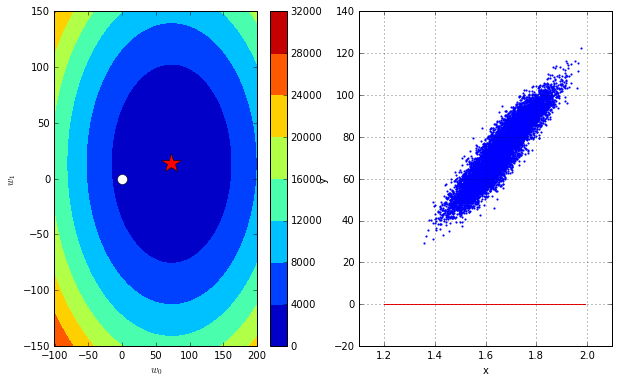

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))